In [1]:
!pip install gym

Script file 'E:\Software\Anaconda\Scripts\pip-script.py' is not present.


In [2]:
!pip install ipympl

Script file 'E:\Software\Anaconda\Scripts\pip-script.py' is not present.


In [3]:
!pip install pyglet

Script file 'E:\Software\Anaconda\Scripts\pip-script.py' is not present.


(0.0, 1.0, 0.0, 1.0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
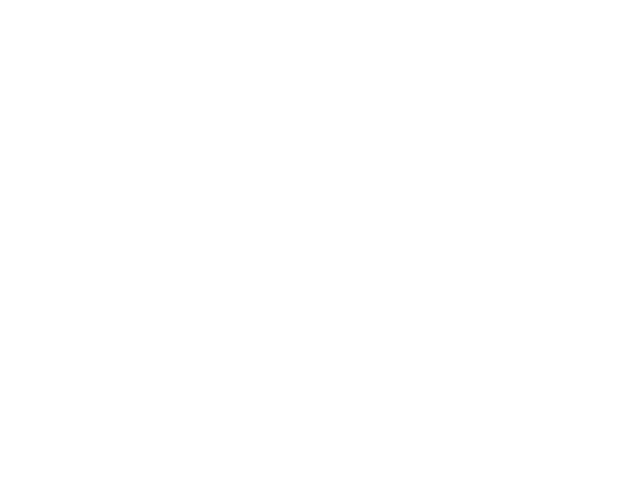

In [4]:
%matplotlib widget

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.axis("off")

In [5]:
import gym

env = gym.make("CartPole-v1")

observation = env.reset()
img = ax1.imshow(env.render(mode='rgb_array'))

for t in range(200):
    action = env.action_space.sample()
    observation,reward,done,info = env.step(action)
    img.set_data(env.render(mode='rgb_array'))
    ax1.text(0.5,0.5,str(t),fontsize=20,backgroundcolor="white")
    fig.canvas.draw()
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

KeyboardInterrupt: 

In [ ]:
Q = {}

epsilon = 0.3
alpha = 0.3
gamma = 0.9

actions = [0, 1]

In [ ]:
def learn(state, action, reward, next_state):
    q_old = Q.get((state, action), None)
    if q_old is None:
        Q[(state, action)] = reward
    else:
        Q[(state, action)] = q_old + alpha * (reward + gamma * max(Q.get((next_state, a), 0) for a in actions) - q_old)
    

In [ ]:
import numpy as np
import random

def choose_action(state):
    q = np.array([Q.get((state, a), 0) for a in actions], dtype=np.float32)
    
    if random.random() < epsilon:
        mag = np.abs(q).max()
        
        q += (np.random.rand(len(actions)) - 0.5) * mag
        
    if q.max() == q.min():
        i = np.random.choice(np.flatnonzero(q == q.max()))
    else:
        i = q.argmax()
        
    return actions[i]

In [ ]:
def quantilize(observation):
    pos, vel, ang, ang_vel = observation
    pos = np.digitize(pos, bins=np.linspace(-2.4, 2.4, num=10))
    vel = np.digitize(vel, bins=np.linspace(-3.5, 3.5, num=10))
    ang = np.digitize(ang, bins=np.linspace(-0.5, 0.5, num=10))
    ang_vel = np.digitize(ang_vel, bins=np.linspace(-3, 3, num=10))
    
    return pos, vel, ang, ang_vel

In [ ]:
%matplotlib widget

import matplotlib.pyplot as plt

fig, ax2 = plt.subplots()
ax2.axis("off")

In [ ]:
import gym

env = gym.make("CartPole-v1")
observation = env.reset()

img = ax1.imshow(env.render(mode='rgb_array'))

last_t = 0
last_avg_t = 0

for episode in range(300):
    observation = env.reset()
    for t in range(200):
        state = quantilize(observation)
        action = choose_action(state)
        observation, reward, done, info = env.step(action)
        next_state = quantilize(observation)
        
        img.set_data(env.render(mode='rgb_array'))
        fig.canvas.draw()
        
        if not done:
            learn(state, action, reward, next_state)
        else:
            learn(state, action, -100, next_state)  #失败时特殊处理
        
            print(f"Episode {episode} finished after {t} timesteps")
            
            ax2.plot([episode, episode + 1], [last_t, t], "blue")
            avg_t = last_avg_t * 0.9 + t * 0.1
            ax2.plot([episode, episode + 1], [last_t, t], "orange")
            fig.canvas.draw()
            last_t = t
            last_avg_t = avg_t
            break
env.close()